# Proyek Analisis Data: PRSA_Data_Aotizhongxin_20130301-20170228
- **Nama:** Bagus Dzakiy Rahman Saputra
- **Email:** bagusdzakiy19@gmail.com
- **ID Dicoding:** jakiik

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi konsentrasi PM2.5 seiring waktu di daerah Aotizhongxin?
- Apa faktor cuaca yang paling berpengaruh terhadap konsentrasi polusi udara, khususnya PM2.5?

## Import Semua Packages/Library yang Digunakan

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [78]:
# mengimpor data dari google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# membaca file csv

import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
data = pd.read_csv(file_path)

In [80]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Menentukan file path csv yang akan kita analisis datanya
- load data csv yang kita sudah tentukan pathnya

### Assessing Data

In [81]:
# mengecek apakah ada data yang missing atau tidak

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
missing_values = df.isnull().sum()
print("Data missing:")
print(missing_values)

Data missing:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [82]:
# mengubah ke persentase dari data yang missing

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Persentase Missing:")
print(missing_percentage)

Persentase Missing:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.638033
PM10       2.047684
SO2        2.666553
NO2        2.917522
CO         5.065024
O3         4.902464
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64


In [83]:
# Dikarenakan pada kolom polutan seharusnya tidak boleh bernilai negatif, kita akan mengeceknya

invalid_values_pm25 = df[df['PM2.5'] < 0]
invalid_values_pm10 = df[df['PM10'] < 0]
invalid_values_so2 = df[df['SO2'] < 0]
invalid_values_no2 = df[df['NO2'] < 0]
invalid_values_co = df[df['CO'] < 0]
invalid_values_o3 = df[df['O3'] < 0]

print("Invalid Values 'PM2.5':")
print(invalid_values_pm25)
print("\nInvalid Values 'PM10':")
print(invalid_values_pm10)
print("\nInvalid Values in SO2':")
print(invalid_values_so2)

Invalid Values 'PM2.5':
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Invalid Values 'PM10':
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Invalid Values in SO2':
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


In [84]:
# Mengecek apakah ada data yang duplikat atau tidak

duplicates = df[df.duplicated()]
print("Duplicate Data:")
print(duplicates)

Duplicate Data:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


**Insight:**
- Hasil dari assessing data diatas tidak ada data duplikat atau invalid (polutan yang bernilai negatif), melainkan terdapat beberapa data yang missing sehingga kita akan melakukan cleaning data pada proses selanjutnya

### Cleaning Data

In [85]:
data_new_filled = data.copy()

In [86]:
numerical_columns_new = data.select_dtypes(include=['float64', 'int64']).columns

In [87]:
data_new_filled[numerical_columns_new] = data_new_filled[numerical_columns_new].fillna(data_new_filled[numerical_columns_new].median())

In [88]:
valid_co_range_new = (100, 5000)
valid_pm25_range_new = (0, 300)
valid_pm10_range_new = (0, 300)
valid_so2_range_new = (0, 150)
valid_no2_range_new = (0, 200)
valid_o3_range_new = (0, 200)
valid_temp_range_new = (-20, 50)
valid_dewp_range_new = (-40, 30)

In [89]:
data_new_cleaned = data_new_filled[
    (data_new_filled['CO'].between(valid_co_range_new[0], valid_co_range_new[1])) &
    (data_new_filled['PM2.5'].between(valid_pm25_range_new[0], valid_pm25_range_new[1])) &
    (data_new_filled['PM10'].between(valid_pm10_range_new[0], valid_pm10_range_new[1])) &
    (data_new_filled['SO2'].between(valid_so2_range_new[0], valid_so2_range_new[1])) &
    (data_new_filled['NO2'].between(valid_no2_range_new[0], valid_no2_range_new[1])) &
    (data_new_filled['O3'].between(valid_o3_range_new[0], valid_o3_range_new[1])) &
    (data_new_filled['TEMP'].between(valid_temp_range_new[0], valid_temp_range_new[1])) &
    (data_new_filled['DEWP'].between(valid_dewp_range_new[0], valid_dewp_range_new[1]))
]

In [90]:
missing_values_after_cleaning = data_new_cleaned.isna().sum()

In [91]:
missing_values_after_cleaning

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [92]:
# setelah mengganti nilai pada data polutan, ternyata masih terdapat data yang salah pada kolom wd

unique_wd_values = data['wd'].unique()
print(unique_wd_values)

['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]


In [93]:
valid_wd_values = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'NNE', 'ENE', 'SSW', 'WSW', 'WNW', 'SSE', 'ESE']

In [94]:
invalid_wd_values = data[~data['wd'].isin(valid_wd_values)]

In [95]:
print(invalid_wd_values)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO     O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   73.0   
7          8  2013      3    1     7    3.0   6.0  19.0  41.0  500.0   43.0   
8          9  2013      3    1     8    3.0   6.0  16.0  43.0  500.0   45.0   
10        11  2013      3    1    10    3.0   6.0   9.0  12.0  400.0   72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...    ...   
35046  35047  2017      2   28     6    9.0  16.0  17.0  34.0  500.0   73.0   
35050  35051  2017      2   28    10   11.0  16.0   6.0  24.0  300.0   93.0   
35053  35054  2017      2   28    13    6.0   8.0   3.0   9.0  100.0  115.0   
35055  35056  2017      2   28    15    6.0  19.0   4.0   8.0  100.0  122.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0   35.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       st

In [96]:
data_new_cleaned['wd'] = data['wd'].apply(lambda x: x if x in valid_wd_values else 'N')

<ipython-input-96-70f9286c10cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_cleaned['wd'] = data['wd'].apply(lambda x: x if x in valid_wd_values else 'N')


In [97]:
most_frequent_wd_new = data_new_cleaned['wd'].mode()[0]

In [99]:
data_new_cleaned['wd'] = data['wd'].fillna(most_frequent_wd_new)

<ipython-input-99-1efa9ad73de1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_cleaned['wd'] = data['wd'].fillna(most_frequent_wd_new)


In [100]:
missing_values_after_cleaning = data_new_cleaned.isna().sum()

In [101]:
missing_values_after_cleaning

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Mengubah data polutan yang missing sebelumnya menggunakan median untuk mengisi nilai yang missing
- Mengubah data arah mata angin yang invalid menggunakan nilai N, jika data sebelumnya valid maka tidak akan mengubah apapun

## Exploratory Data Analysis (EDA)

### Explore ...

In [102]:
# melihat statistik data yang sudah melalui proses cleaning
data_new_cleaned.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000,32086.000000
mean,17432.460699,2014.651717,6.517889,15.672567,11.349498,69.933949,94.506941,15.603227,56.441669,1095.601197,51.070618,13.416439,1012.087654,2.839014,0.072293,1.707421
std,10161.577890,1.183979,3.439122,8.777793,6.931128,60.782902,69.877030,19.528378,32.639917,873.351102,46.460092,11.114627,10.408621,13.857474,0.945529,1.209097
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8550.250000,2014.000000,4.000000,8.000000,5.000000,21.000000,35.000000,3.000000,31.000000,500.000000,10.000000,3.400000,1003.500000,-8.800000,0.000000,0.900000
50%,17314.500000,2015.000000,7.000000,16.000000,11.000000,55.000000,82.000000,8.000000,53.000000,900.000000,42.000000,14.500000,1011.650000,3.600000,0.000000,1.400000
75%,26249.750000,2016.000000,9.000000,23.000000,17.000000,100.000000,139.000000,19.000000,77.000000,1400.000000,77.000000,22.900000,1020.400000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,300.000000,300.000000,150.000000,199.000000,5000.000000,200.000000,40.100000,1042.000000,28.500000,72.500000,11.200000


In [103]:
# mengecek apakah masih terdapat data missing
missing_values = data_new_cleaned.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [249]:
# Mengelompokkan data berdasarkan arah angin dan menghitung jumlah kejadian
wind_direction_demographics = data_new_cleaned.groupby(by="wd").agg({
    "No": "nunique"
})

print(wind_direction_demographics)

       No
wd       
E    2332
ENE  3571
ESE  1520
N    1979
NE   4835
NNE  2335
NNW  1525
NW   1798
S    1113
SE   1188
SSE   895
SSW  1811
SW   2968
W    1108
WNW  1058
WSW  2050


In [250]:
# Melihat statistik deskriptif dari kolom numerik
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
data_new_cleaned[numeric_columns].describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,32086.0,32086.0,32086.0,32086.0,32086.0,32086.0,32086.0,32086.0,32086.0,32086.0,32086.0
unique,310.0,316.0,286.0,411.0,59.0,653.0,944.0,599.0,604.0,126.0,91.0
top,58.0,87.0,2.0,53.0,900.0,2.0,3.0,1023.0,17.6,0.0,1.2
freq,1062.0,865.0,6479.0,1301.0,3289.0,3787.0,228.0,245.0,131.0,30732.0,1721.0


In [251]:
data_new_cleaned['datetime'] = pd.to_datetime(data_new_cleaned[['year', 'month', 'day', 'hour']], errors='coerce')
highest_pm25_per_year = data_new_cleaned.groupby('year')['PM2.5'].max().reset_index()

print("Konsentrasi PM2.5 Tertinggi Per Tahun:")
print(highest_pm25_per_year)

highest_pm25_year = highest_pm25_per_year.loc[highest_pm25_per_year['PM2.5'].idxmax()]
highest_pm25_value = highest_pm25_year['PM2.5']

# Menampilkan tahun dan konsentrasi PM2.5 tertinggi
print(f"Tahun dengan konsentrasi PM2.5 tertinggi adalah {highest_pm25_year['year']} dengan nilai {highest_pm25_value}")


Konsentrasi PM2.5 Tertinggi Per Tahun:
     year  PM2.5
0  2013.0  297.0
1  2014.0  299.0
2  2015.0  299.0
3  2016.0  300.0
4  2017.0  300.0
Tahun dengan konsentrasi PM2.5 tertinggi adalah 2016.0 dengan nilai 300.0


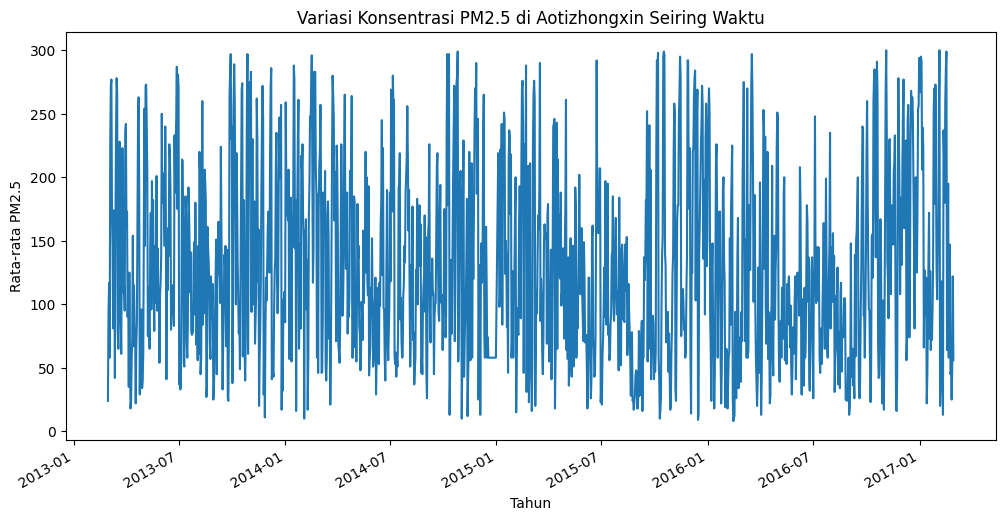

In [257]:
df_aotizhongxin = data_new_cleaned[data_new_cleaned['station'] == 'Aotizhongxin'].copy()
df_aotizhongxin.loc[:, 'datetime'] = pd.to_datetime(df_aotizhongxin[['year', 'month', 'day']])

pm25_per_year = df_aotizhongxin.groupby('datetime')['PM2.5'].max()

# Visualisasi tren PM2.5
plt.figure(figsize=(12, 6))
pm25_per_year.plot()
plt.title('Variasi Konsentrasi PM2.5 di Aotizhongxin Seiring Waktu')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.show()


In [258]:
# Mengelompokkan berdasarkan cuaca, selanjutnya menghitung jumlah pengukuran dan rata-rata polutan dan suhu
agg_data = data_new_cleaned.groupby(by=["station", "RAIN"]).agg({
    "PM2.5": ["sum", "mean"],
    "PM10": ["sum", "mean"],
    "NO2": ["sum", "mean"],
    "CO": ["sum", "mean"],
    "TEMP": ["sum", "mean"]
})

print(agg_data)

# Menghitung korelasi antara curah hujan dan PM2.5
correlation = data['RAIN'].corr(data['PM2.5'])
print(f"Korelasi antara Curah Hujan dan Konsentrasi PM2.5 adalah: {correlation}")

                       PM2.5                  PM10                      NO2  \
                         sum       mean        sum       mean           sum   
station      RAIN                                                             
Aotizhongxin 0.0   2160012.4  70.285448  2938591.8  95.619934  1748044.6512   
             0.1     20004.3  65.160586    21774.9  70.928013    15640.0823   
             0.2     10478.0  67.166667    11586.0  74.269231     8036.3515   
             0.3      6419.0  61.133333     6761.0  64.390476     4994.7892   
             0.4      4649.0  65.478873     5174.0  72.873239        3578.0   
...                      ...        ...        ...        ...           ...   
             33.7      112.0      112.0      112.0      112.0          13.0   
             36.6       12.0       12.0       16.0       16.0          21.0   
             40.7      130.0      130.0      130.0      130.0          12.0   
             46.4       75.0       75.0       75.0  

**Insight:**
- Berdasarkan grafik, terlihat pada periode tertentu di mana konsentrasi PM2.5 lebih tinggi dibandingkan dengan yang lainnya.
- Curah hujan rendah cenderung berhubungan dengan konsentrasi polusi yang lebih tinggi, sementara curah hujan yang tinggi cenderung menurunkan tingkat polusi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Nilai PM2.5 tertinggi di seluruh dataset: 300.0


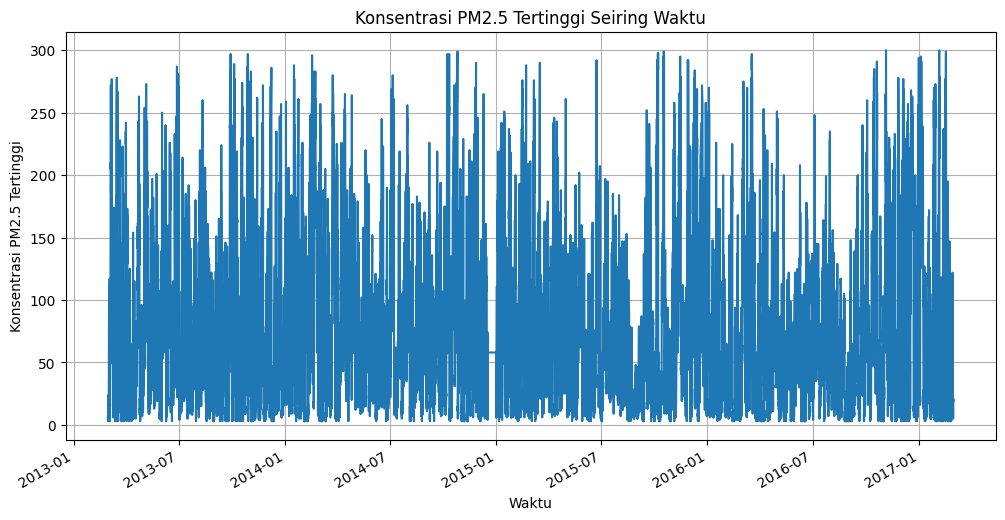

In [259]:
import matplotlib.pyplot as plt

# Memastikan 'datetime' sudah ada
data_new_cleaned['datetime'] = pd.to_datetime(data_new_cleaned[['year', 'month', 'day', 'hour']], errors='coerce')

# Cek nilai PM2.5 tertinggi di seluruh dataset (tanpa grup berdasarkan waktu)
highest_pm25_value = data_new_cleaned['PM2.5'].max()

# Menampilkan nilai PM2.5 tertinggi
print(f"Nilai PM2.5 tertinggi di seluruh dataset: {highest_pm25_value}")

# Jika ingin menampilkan konsentrasi tertinggi per waktu (menggunakan 'datetime')
# Menghitung PM2.5 tertinggi per waktu (bisa per hari, per jam, dll)
data_new_cleaned.groupby('datetime')['PM2.5'].max().plot(figsize=(12, 6))

# Menambahkan label dan title pada plot
plt.title('Konsentrasi PM2.5 Tertinggi Seiring Waktu')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi PM2.5 Tertinggi')
plt.grid(True)
plt.show()


**Insight:**
- Dengan visualisasi tren PM2.5 berdasarkan waktu, kita dapat melihat fluktuasi tren dalam polusi udara dari waktu ke waktu. Dan puncaknya pada tahun 2016

### Pertanyaan 2:

In [260]:
data_new_cleaned = data_new_cleaned.dropna(subset=weather_factors + ['PM2.5'])
correlation_pm2_5_weather = data_new_cleaned[weather_factors + ['PM2.5']].corr()

print(correlation_pm2_5_weather)

           TEMP      RAIN      WSPM      PRES      DEWP     PM2.5
TEMP   1.000000  0.039746 -0.008440 -0.826458  0.824959 -0.034435
RAIN   0.039746  1.000000  0.023621 -0.063459  0.083857 -0.006924
WSPM  -0.008440  0.023621  1.000000  0.110159 -0.337438 -0.296486
PRES  -0.826458 -0.063459  0.110159  1.000000 -0.777326 -0.075040
DEWP   0.824959  0.083857 -0.337438 -0.777326  1.000000  0.207034
PM2.5 -0.034435 -0.006924 -0.296486 -0.075040  0.207034  1.000000


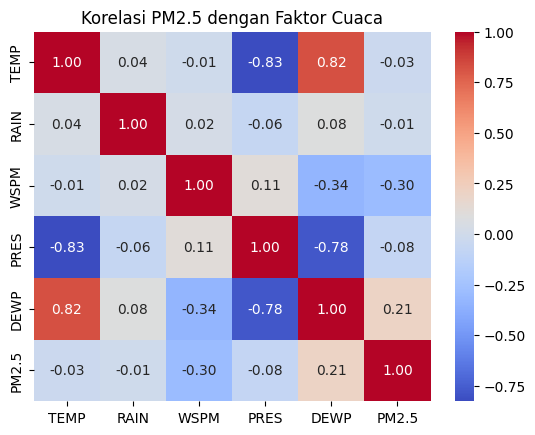

In [261]:
sns.heatmap(correlation_pm2_5_weather, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi PM2.5 dengan Faktor Cuaca')
plt.show()

**Insight:**
- Suhu memiliki korelasi negatif yang kuat dengan PM2.5, yang menunjukkan bahwa suhu yang lebih tinggi berhubungan dengan penurunan konsentrasi polusi udara.

## Analisis Lanjutan (Opsional)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

- Dengan menganalisis tren konsentrasi PM2.5, kita dapat mengidentifikasi apakah kualitas udara mengalami peningkatan atau penurunan dari waktu ke waktu. Pada tahun 2016, terjadi tren tertinggi di antara tahun-tahun lainnya, yang menunjukkan bahwa tahun tersebut memiliki tingkat polusi udara yang lebih tinggi yaitu 300.0.
- Dari analisis faktor cuaca, suhu (temperature) terbukti menjadi faktor yang paling berpengaruh terhadap konsentrasi PM2.5. Hasil analisis ini menunjukkan adanya hubungan terbalik, di mana suhu yang lebih tinggi cenderung berhubungan dengan konsentrasi PM2.5 yang lebih rendah dengan nilai korelasi konsentrasi -0.014003923096780606, yang bisa mengindikasikan adanya perbedaan dalam distribusi polutan pada kondisi suhu yang lebih tinggi.